In [1]:
import garpar as gp
import itertools as it
import numpy as np
import joblib as jb
import tqdm.notebook
import scipy 
import matplotlib.pyplot as plt


Los parámetros  por defecto de la levi estable son **alpha=1.6411, beta=-0.0126,mu=0.0005,    sigma=0.005** Para analizar la variación en mu se analiza el intervalo de confianza para la media para la distribución levy estable con esos parámetros.

In [2]:
interval_mu = scipy.stats.levy_stable.interval(confidence=0.99, alpha=1.6411, beta=-0.0126, 
                                         loc=0.0005, scale=0.005)
interval_mu

(-0.04195648420097981, 0.04238113300757857)

# Variación de $\mu$ 

In [4]:
mus = np.linspace(-0.041956,0.004238,100)


N_JOBS=-1
total = 100

simus = []
for  mu in tqdm.notebook.tqdm(mus):
    seed = np.random.randint(0, np.iinfo(int).max)
    market = gp.datasets.make_risso_levy_stable(
        mu=mu, random_state=seed, n_jobs=N_JOBS, stocks=100, price=1000)
    delisted = market.delisted.sum()/100
    simulation_data = { 
        'seed': seed,
        'mu': mu,
        'delisted': delisted                       
    }
    simus.append(simulation_data)

jb.dump(simus, 'data/simu_levi_mu.bz2', compress=9)
del simus

  0%|          | 0/100 [00:00<?, ?it/s]

# Variación de $\sigma$ 

In [ ]:
sigmas = np.linspace(0.0005, 0.05,100)

N_JOBS=-1
total = 100

simus = []
for  sigma in tqdm.notebook.tqdm(sigmas):
    seed = np.random.randint(0, np.iinfo(int).max)
    market = gp.datasets.make_risso_levy_stable(sigma=sigma, 
                                                random_state=seed, n_jobs=N_JOBS,
                                                stocks=100, price=1000)
    delisted = market.delisted.sum()
    simulation_data = { 'seed': seed,
                       'sigma': sigma,
                       'delisted': delisted                       
                      }
    simus.append(simulation_data)

jb.dump(simus, 'data/simu_levi_sigma.bz2', compress=9)
del simus


# Variación de $\alpha$ 

In [ ]:
#alpha = kurt

alphas= np.linspace( 0.5, 2, 100)

N_JOBS=-1
total = 100

simus = []
for  alpha in tqdm.notebook.tqdm(alphas):
    seed = np.random.randint(0, np.iinfo(int).max)
    market = gp.datasets.make_risso_levy_stable(alpha=alpha, 
                                               random_state=seed, n_jobs=N_JOBS,
                                               stocks=100, price=1000)
    delisted = market.delisted.sum()
    simulation_data = { 'seed': seed,
                       'alpha': alpha,
                       'delisted': delisted                       
                      }
    simus.append(simulation_data)

jb.dump(simus, 'data/simu_levi_alpha.bz2', compress=9)
del simus

In [5]:
#no admite cero y falla con valores menores a 0.05, el código pasa desde 0.0101 
#que da un número muy grande pero trabajable en memoria. Desde valores de alfa de 0.23
# empieza  a dar números coherehtes pero cuando cambia la semilla son grandes. El umbral
# puede ser 0.5 parece mas estable. Tampoco el valor de alfa es más grande que 2
#failure = gp.datasets.make_risso_levy_stable(alpha=0.01, random_state=seed, n_jobs=1, stocks=100, price=1000) 
#failure
ls = scipy.stats.levy_stable(
        alpha=2.0, beta=-0.0126, loc=0.0005, scale=0.005
)
ls.rvs()

array(0.01592451)

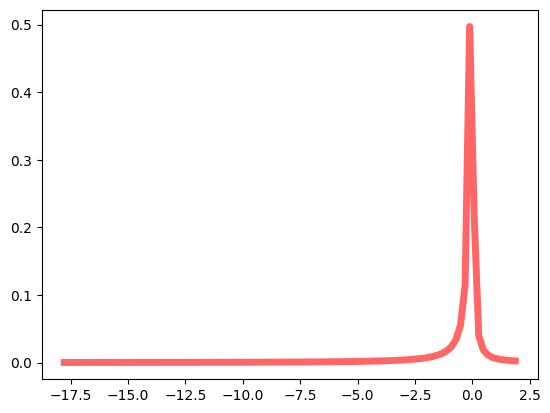

In [6]:
fig, ax = plt.subplots(1, 1)
#alpha, beta = 1.8, -0.5
alpha, beta, loc, scale = 0.5, -0.5, 0.0005, 0.005

x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax.plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),
       'r-', lw=5, alpha=0.6, label='levy_stable pdf')

In [ ]:
alpha, beta, loc, scale = 0.5, 0.0001, 0.005, 0.0005
scipy.stats.levy_stable.ppf(0.5, alpha, beta, loc, scale)

In [ ]:
alpha, beta, loc, scale = 0.6, 0.5, 0, 1
scipy.stats.levy_stable.ppf(0.3033, alpha, beta, loc, scale)*1+0.005
# con alfa de 0,5 y asimetría positiva de 0.5 el quiebre es 0.2045 los valores por debajo devuelve valores
# menores que cero al desestandarizar el valor se transforma en positivo. Si tomo la estandarización el
# umbral es 0.2033
#


In [ ]:
a = scipy.stats.levy_stable.rvs(alpha=0.5, beta=-0.5, loc=0.0005, scale=0.005, size=10, random_state=52)
a


In [ ]:
b = scipy.stats.levy_stable.rvs(alpha=0.5, beta=0.5, loc=0.0005, scale=0.005, size=10, random_state=52)
b

# Variación de $\beta$ 

In [ ]:
# beta = skew
betas= np.linspace(-0.5, 0.5, 100)

N_JOBS=-1
total = 100

simus = []
for  beta in tqdm.notebook.tqdm(betas):
    seed = np.random.randint(0, np.iinfo(int).max)
    market = gp.datasets.make_risso_levy_stable(beta=beta, 
                                                random_state=seed, n_jobs=N_JOBS,
                                                stocks=100, price=1000)
    delisted = market.delisted.sum()
    simulation_data = { 'seed': seed,
                       'beta': beta,
                       'delisted': delisted                       
                      }
    simus.append(simulation_data)

jb.dump(simus, 'data/simu_levi_beta.bz2', compress=9)
del simus